In [12]:
# Cell 1: Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [13]:
# Cell 2: Load the news data
news_df = pd.read_csv('../data/raw_analyst_ratings.csv')
print("📰 News Data Shape:", news_df.shape)
print("\nNews Data Columns:")
print(news_df.columns.tolist())

📰 News Data Shape: (1407328, 6)

News Data Columns:
['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']


In [14]:
# Cell 3: Display first few rows of news data
print("First 5 rows of News Data:")
news_df.head()

First 5 rows of News Data:


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [15]:
# Cell 4: Basic information about news data
print("📊 News Data Info:")
news_df.info()

📊 News Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [16]:
# Cell 5: Check for missing values in news data
print("🔍 Missing Values in News Data:")
missing_news = news_df.isnull().sum()
print(missing_news[missing_news > 0])

🔍 Missing Values in News Data:
Series([], dtype: int64)


In [17]:
# Cell 6: Descriptive Statistics for Text Data
print("📏 Headline Length Analysis:")
news_df['headline_length'] = news_df['headline'].str.len()
print("Headline Length Statistics:")
print(news_df['headline_length'].describe())

📏 Headline Length Analysis:
Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [18]:
# Cell 7: Articles per Publisher
print("🏢 Articles per Publisher:")
publisher_counts = news_df['publisher'].value_counts()
print("Top 10 Publishers:")
print(publisher_counts.head(10))

🏢 Articles per Publisher:
Top 10 Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


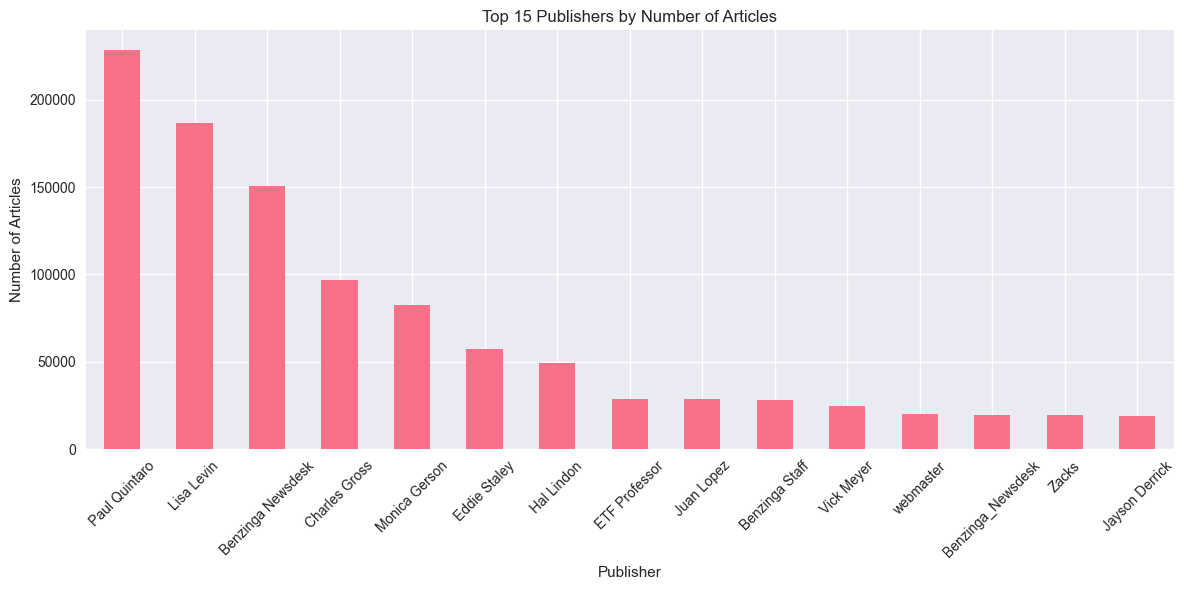

In [19]:
# Cell 8: Plot articles per publisher (Top 15)
plt.figure(figsize=(12, 6))
publisher_counts.head(15).plot(kind='bar')
plt.title('Top 15 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# Cell 9: Convert date and analyze publication trends
print("📅 Publication Date Analysis:")
news_df['date'] = pd.to_datetime(news_df['date'])
news_df['publication_date'] = news_df['date'].dt.date
news_df['publication_day'] = news_df['date'].dt.day_name()

print("Date range:", news_df['date'].min(), "to", news_df['date'].max())

📅 Publication Date Analysis:


ValueError: time data "2020-05-22 00:00:00" doesn't match format "%Y-%m-%d %H:%M:%S%z", at position 10. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [21]:
# Cell 10: Articles by day of week
print("📈 Articles by Day of Week:")
day_counts = news_df['publication_day'].value_counts()
print(day_counts)

plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar')
plt.title('Number of Articles by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()

📈 Articles by Day of Week:


KeyError: 'publication_day'